<h3> LOGISTICS REGRESSION </h3>

In [3]:
RE8 <- read.csv("C:\\Realestate\\CleanedRE.csv", header=TRUE,
                    stringsAsFactors =FALSE,
                    strip.white =TRUE,
                    sep = ',', na.strings=c("","NA"))
#colSums(is.na(RE8))
library(dplyr)

TH <- read.csv("C:\\Realestate\\TH.csv", header=TRUE,
                stringsAsFactors =FALSE,
                strip.white =TRUE,
                sep = ',', na.strings=c("","NA"))
TU <- read.csv("C:\\Realestate\\TU.csv", header=TRUE,
               stringsAsFactors =FALSE,
               strip.white =TRUE,
               sep = ',', na.strings=c("","NA"))
UH <- read.csv("C:\\Realestate\\UH.csv", header=TRUE,
               stringsAsFactors =FALSE,
               strip.white =TRUE,
               sep = ',', na.strings=c("","NA"))


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



<h5> on HU </h5>

'data.frame':	6481 obs. of  9 variables:
 $ Rooms       : int  2 3 4 2 3 2 2 2 1 3 ...
 $ Type        : chr  "h" "h" "h" "h" ...
 $ Price       : int  1480000 850000 1600000 1636000 1000000 1097000 542000 760000 481000 1350000 ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Bedroom2    : int  2 3 3 2 3 3 3 3 3 3 ...
 $ Bathroom    : int  1 2 1 1 1 1 1 1 1 2 ...
 $ Car         : int  1 1 2 2 1 2 1 1 1 2 ...
 $ Landsize    : num  202 94 120 256 469 ...
 $ BuildingArea: num  147 147 142 107 147 ...
'data.frame':	6481 obs. of  10 variables:
 $ Rooms       : int  2 3 4 2 3 2 2 2 1 3 ...
 $ Type        : chr  "h" "h" "h" "h" ...
 $ Price       : int  1480000 850000 1600000 1636000 1000000 1097000 542000 760000 481000 1350000 ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Bedroom2    : int  2 3 3 2 3 3 3 3 3 3 ...
 $ Bathroom    : int  1 2 1 1 1 1 1 1 1 2 ...
 $ Car         : int  1 1 2 2 1 2 1 1 1 2 ...
 $ Landsize    : num  202 94 120 256 4

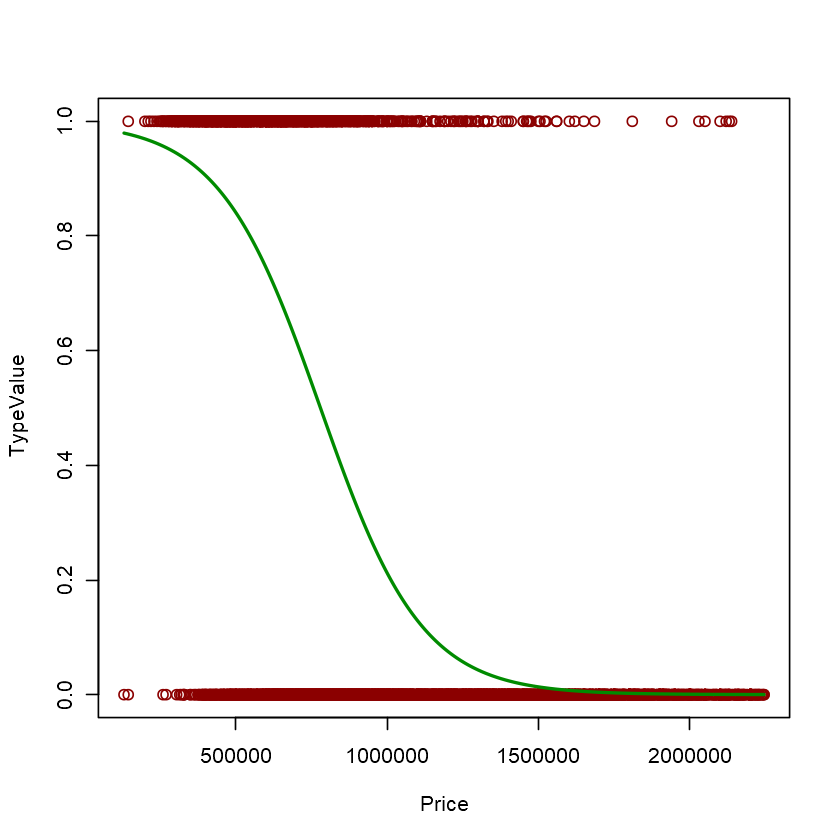

[1] 0.6314199

[1] 0.9490014

,0,1
0,4894,488
1,263,836


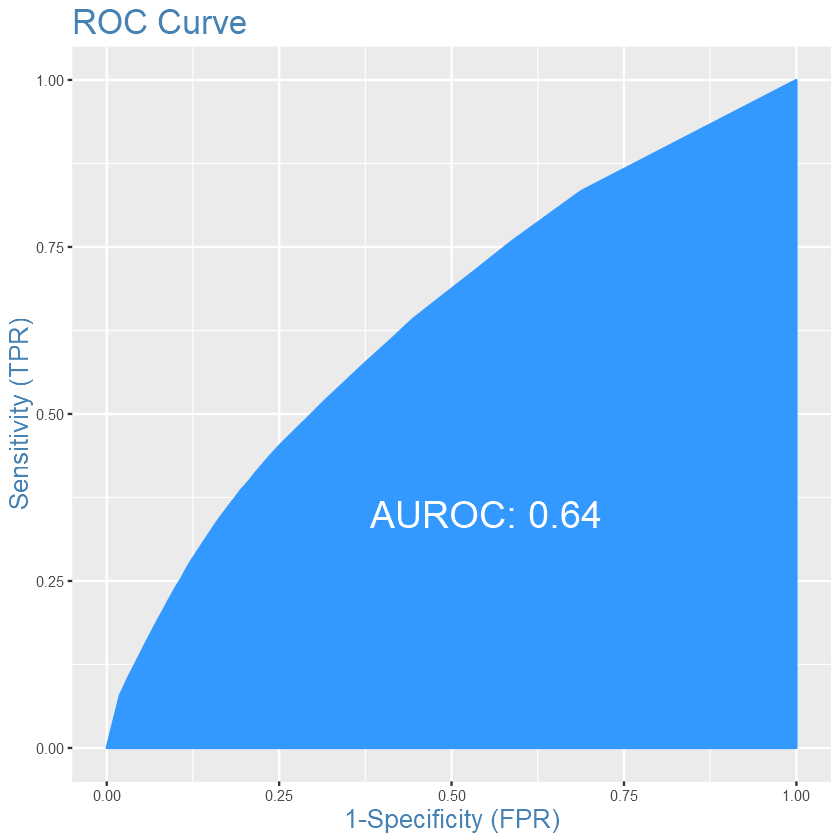

In [4]:
#Predicting and classifying according to price, what will be the type.
#We have to infer which between type U and H  has better impact on price.
#To be done on all split type data, TH,TU,UH..and than compare all three by confusion matrix.
#ROC will tell ..% of model is good to infer Type T&U.

hu.data1<- read.csv("C:\\Realestate\\UH1.csv",header=TRUE,
                    stringsAsFactors =FALSE,
                    strip.white =TRUE,
                    sep = ',', na.strings=c("","NA"))


#str(hu.data1)
hu.data <- hu.data1[c(-1,-2,-3,-7,-8,-9,-11,-17,-18,-19,-20)] #removed unnecessary columns
str(hu.data)

#ifelse, take type h=0 else u=1
HU <- mutate(hu.data, TypeValue = ifelse(hu.data$Type == "h",0,1))
str(HU)
# head(HU, 10)
#Logistic regression plotting, Took variables Price and rooms
log.model1 <- glm(TypeValue ~ Price+Rooms, data=HU,family=binomial)

#takin min , max and putting price and rooms in sequence ascending order & storing in pricedata
#min max range because we don't want to predict in 0 price and more price
pricedata <- data.frame(Price=seq(min(HU$Price), max(HU$Price),len=6481))
pricedata <- mutate(pricedata, Rooms=seq(min(HU$Rooms),max(HU$Rooms),len=6481))

str(pricedata)

pricedata$TypeValue<- predict(log.model1,newdata=pricedata,type='response')

plot(TypeValue~Price,data=HU,col="red4",ylim=c(0,1))

lines(TypeValue ~ Price, pricedata, col="green4", lwd=2)
#ROC curve

library(InformationValue)
predicted1<- predict(log.model1, HU, type="response")  # predicted scores
#predicted
plotROC(HU, predicted1) #ROC=64%
#Conclusion- With price 5 lakh and below, it's definitely "u."Chance of predicting "U" is 80%. Since curve is not touching the 1 line completely.
#With price above 15lakh, it's definitely "h."Chance of predicting "H" is 100%. Since curve is touching the 0 line completely.
#Chances of predicting "h" is more

#specificity and sensitivity
sensitivity(HU$TypeValue, predicted1, threshold = 0.5)
specificity(HU$TypeValue, predicted1, threshold = 0.5)
#confusion Matrix
confusionMatrix(HU$TypeValue, predicted1 >= 0.5)

<h5> On TU </h5>

'data.frame':	2429 obs. of  9 variables:
 $ Rooms       : int  2 2 2 1 1 2 1 1 3 2 ...
 $ Type        : chr  "t" "u" "u" "u" ...
 $ Price       : int  745000 542000 760000 481000 500000 847000 480000 423500 962000 970000 ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Bedroom2    : int  3 3 3 3 3 3 3 3 3 3 ...
 $ Bathroom    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Car         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Landsize    : num  469 469 469 469 469 ...
 $ BuildingArea: num  147 147 147 147 147 ...


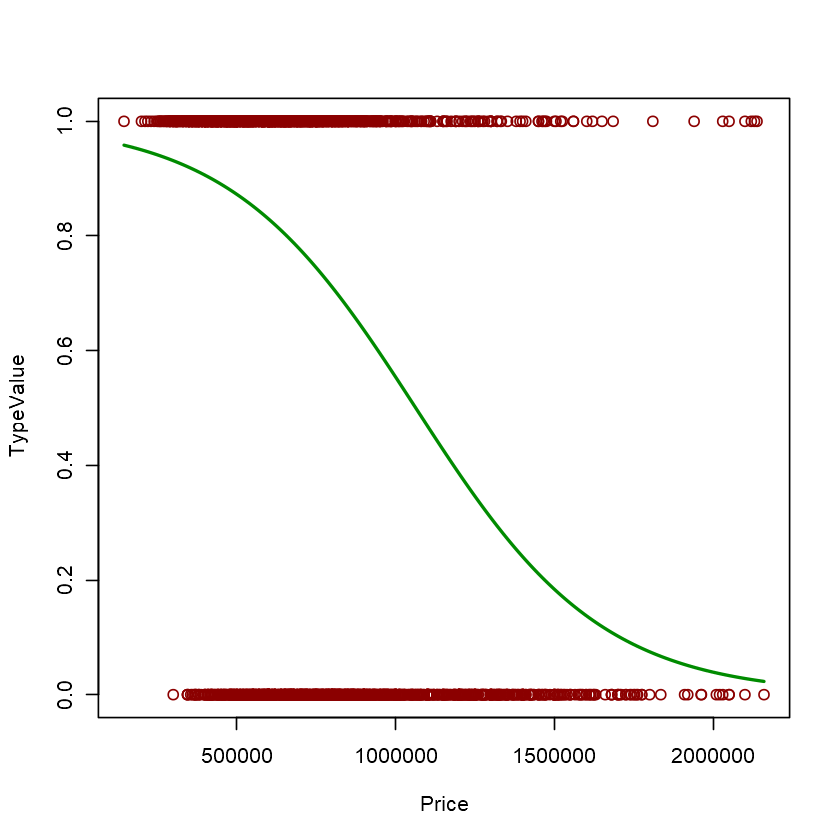

[1] 0.760574

[1] 0.7149321

,0,1
0,790,317
1,315,1007


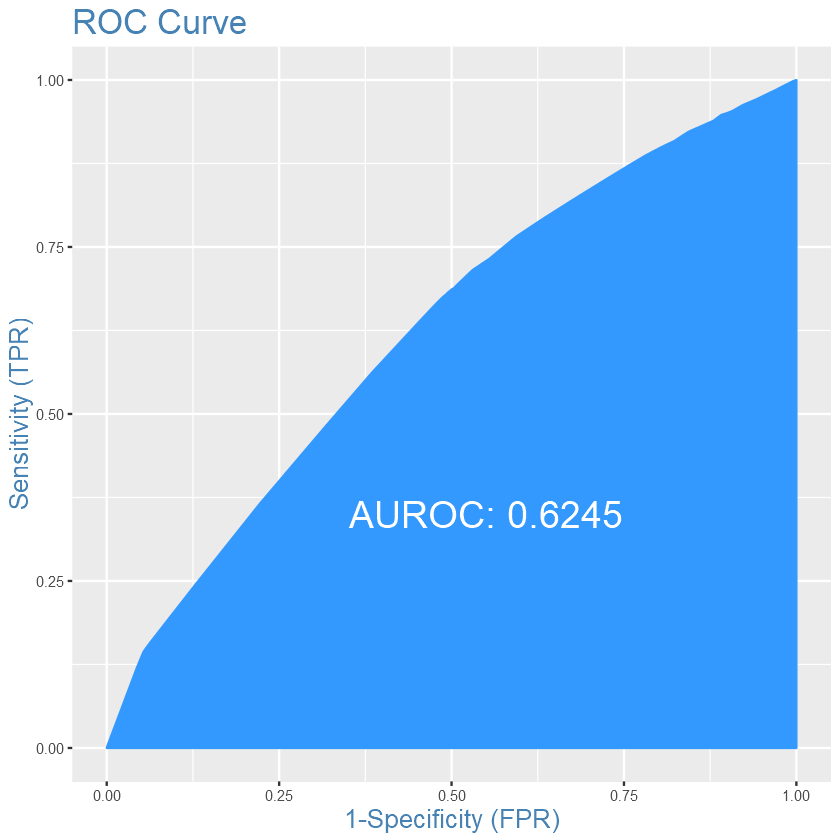

In [5]:
#We have to infer which between type U and T  has better impact on price.
#To be done on all split type data, TH,TU,UH..and than compare all three by confusion matrix.


tu.data1<- read.csv("C:\\Realestate\\TU.csv",header=TRUE,
                    stringsAsFactors =FALSE,
                    strip.white =TRUE,
                    sep = ',', na.strings=c("","NA"))


#str(tu.data1)
tu.data <- tu.data1[c(-1,-2,-3,-7,-8,-9,-11,-17,-18,-19,-20)] #removed unnecessary columns
str(tu.data)

#ifelse, take type t=0 else u=1
TU <- mutate(tu.data, TypeValue = ifelse(tu.data$Type == "t",0,1))
# head(TU, 10)
#Logistic regression plotting, Took variables Price and rooms
log.model2 <- glm(TypeValue ~ Price+Rooms, data=TU,family=binomial)


#takin min , max and putting price and rooms in sequence ascending order & storing in pricedata
#min max range because we don't want to predict in 0 price and more price
pricedata2 <- data.frame(Price=seq(min(TU$Price), max(TU$Price),len=2429))
pricedata2 <- mutate(pricedata2, Rooms=seq(min(TU$Rooms),max(TU$Rooms),len=2429))

#str(pricedata2)

pricedata2$TypeValue<- predict(log.model2,newdata=pricedata2,type='response')

plot(TypeValue~Price,data=TU,col="red4",ylim=c(0,1))

lines(TypeValue ~ Price, pricedata2, col="green4", lwd=2)

#Conclusion- With price below 5 lakh, it's definitely "u."Chance of predicting "U" is 100%. Since curve is almost touching the 1 line completely.
#With price above 20lakh, it's definitely "h."Chance of predicting "H" is 100%. Since curve is almost touching the 0 line.

#ROC curve
library(InformationValue)
predicted2<- predict(log.model2, TU, type="response")  # predicted scores
#predicted
plotROC(TU, predicted2) #62% ROC
#specificity and sensitivity
sensitivity(TU$TypeValue, predicted2, threshold = 0.5)
specificity(TU$TypeValue, predicted2, threshold = 0.5)

#confusion Matrix
confusionMatrix(TU$TypeValue, predicted2 >= 0.5)


<h5> On TH </h5>

'data.frame':	6262 obs. of  9 variables:
 $ Rooms       : int  2 3 4 2 3 2 2 3 4 2 ...
 $ Type        : chr  "h" "h" "h" "h" ...
 $ Price       : int  1480000 850000 1600000 1636000 1000000 745000 1097000 1350000 1985000 1172500 ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Bedroom2    : int  2 3 3 2 3 3 3 3 3 2 ...
 $ Bathroom    : int  1 2 1 1 1 1 1 2 1 1 ...
 $ Car         : int  1 1 2 2 1 1 2 2 1 1 ...
 $ Landsize    : num  202 94 120 256 469 ...
 $ BuildingArea: num  147 147 142 107 147 ...
'data.frame':	6262 obs. of  2 variables:
 $ Price: num  131000 131338 131675 132013 132351 ...
 $ Rooms: num  1 1 1 1 1 ...


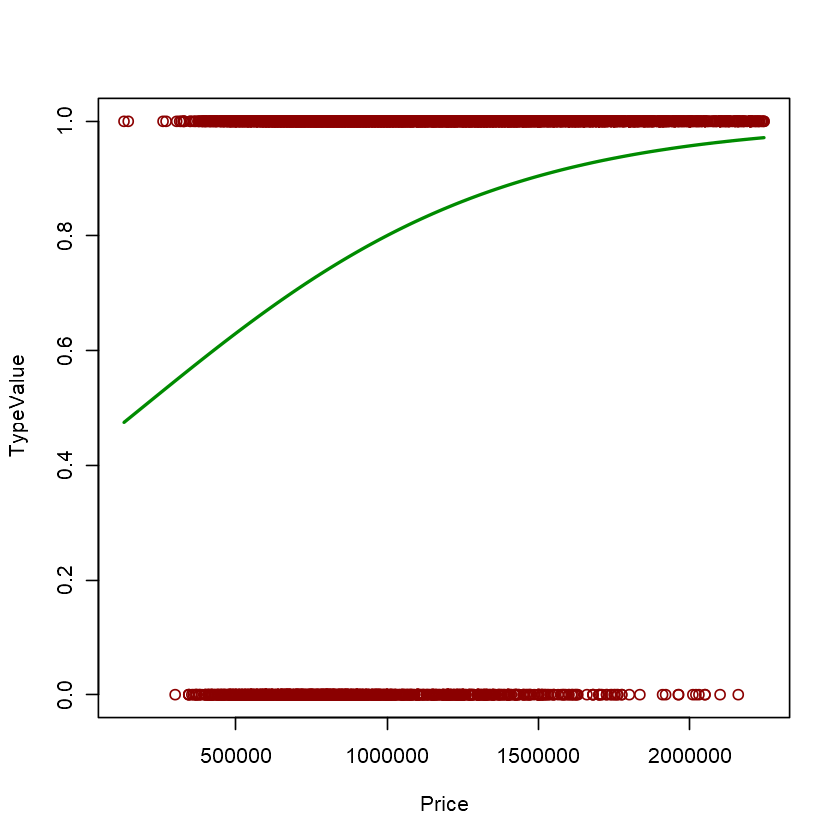

[1] 1

[1] 0

,0,1
0,3,13
1,1102,5144


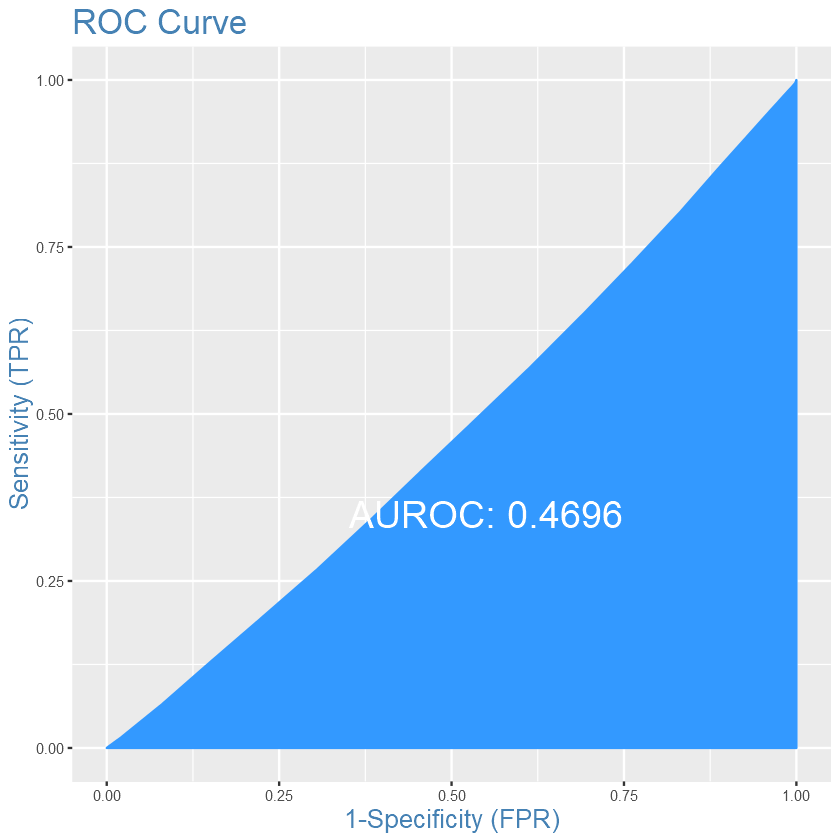

In [6]:
#We have to infer which between type T and H  has better impact on price.
#To be done on all split type data, TH,TU,UH..and than compare all three by confusion matrix.


th.data1<- read.csv("C:\\Realestate\\TH.csv",header=TRUE,
                    stringsAsFactors =FALSE,
                    strip.white =TRUE,
                    sep = ',', na.strings=c("","NA"))


#str(th.data1)

th.data <- th.data1[c(-1,-2,-3,-7,-8,-9,-11,-17,-18,-19,-20)] #removed unnecessary columns
str(th.data)

#ifelse, take type t=0 else u=1
TH <- mutate(th.data, TypeValue = ifelse(th.data$Type == "t",0,1))
# head(TH, 10)
#Logistic regression plotting, Took variables Price and rooms
log.model3 <- glm(TypeValue ~ Price+Rooms, data=TH,family=binomial)
#takin min , max and putting price and rooms in sequence ascending order & storing in pricedata
#min max range because we don't want to predict in 0 price and more price
pricedata3 <- data.frame(Price=seq(min(TH$Price), max(TH$Price),len=6262))
pricedata3 <- mutate(pricedata3, Rooms=seq(min(TH$Rooms),max(TH$Rooms),len=6262))

str(pricedata3)

pricedata3$TypeValue<- predict(log.model3,newdata=pricedata3,type='response')

plot(TypeValue~Price,data=TH,col="red4",ylim=c(0,1))

lines(TypeValue ~ Price, pricedata3, col="green4", lwd=2)
#Conclusion- With price 20 lakh and above its definitely "h". For lower price we can't predict "t". Above 80% prediction is good.
#This model is good for predicting higher price in <-h category

#ROC curve

library(InformationValue)
predicted3<- predict(log.model3, TH, type="response")  # predicted scores
#predicted
plotROC(TH, predicted3) #ROC=46%

#specificity and sensitivity
sensitivity(TH$TypeValue, predicted3, threshold = 0.5)
specificity(TH$TypeValue, predicted3, threshold = 0.5)

#Since we have took condition 0.6 here so consider graph typevalue 0.6 above is h, and below 0.6 is T,
##From confusion matrix, we can see the data is not much in t to infer, after putting the condition 0.6.
#confusion Matrix
confusionMatrix(TH$TypeValue, predicted3 >= 0.6)